Импорт библиотек

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
import warnings
warnings.filterwarnings('ignore')

Загружаем датасет [Company Bankruptcy Prediction](https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction). Он содержит 95 признаков - финансовых показателей, и один таргет - является ли компания банкротом (0 или 1). Решаем задачу бинарной классификации.

Загружаем датасет

In [202]:
df = pd.read_csv('https://drive.google.com/uc?id=1jV76XNGLZPOzNAI9iCrvnsGQzfEDWXF1')
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                             0.3706          
1          1                                             0.4643          
2          1                                             0.4261          
3          1                                             0.3998          
4          1                                             0.4650          

    ROA(A) before interest and % after tax  \
0                                   0.4244   
1                                   0.5382   
2                                   0.4990   
3                                   0.4513   
4                                   0.5384   

    ROA(B) before interest and depreciation after tax  \
0                                             0.4057    
1                                             0.5167    
2                                             0.4723    
3                                             0.4577    
4                                             0.5223    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                   0.6015                        0.6015   
1                   0.6102                        0.6102   
2                   0.6015                        0.6014   
3                   0.5835                        0.5835   
4                   0.5988                        0.5988   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                  0.9990                      0.7969   
1                  0.9989                      0.7974   
2                  0.9989                      0.7964   
3                  0.9987                      0.7970   
4                  0.9990                      0.7974   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                        0.8088                                        0.3026   
1                        0.8093                                        0.3036   
2                        0.8084                                        0.3020   
3                        0.8090                                        0.3033   
4                        0.8093                                        0.3035   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                       0.7168                      0.0092   
1  ...                       0.7953                      0.0083   
2  ...                       0.7747                      0.0400   
3  ...                       0.7396                      0.0033   
4  ...                       0.7950                      0.0039   

    No-credit Interval   Gross Profit to Sales  \
0               0.6229                  0.6015   
1               0.6237                  0.6102   
2               0.6238                  0.6014   
3               0.6229                  0.5835   
4               0.6235                  0.5988   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                               0.8279                0.2902   
1                               0.8400                0.2838   
2                               0.8368                0.2902   
3                               0.8347                0.2817   
4                               0.8400                0.2785   

    Degree of Financial Leverage (DFL)  \
0                               0.0266   
1                               0.2646   
2                               0.0266   
3                               0.0267   
4                               0.0248   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                             0.5641                   1   
1                                             0.5702                   1   
2                                             0.5637                   1   
3                                             0.5647                   1   
4                        

# 1. Preprocessing data

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

нет пустых значений, все численные

In [204]:
# подсчет дубликатов
num_duplicates = df.duplicated().sum()
print(num_duplicates)

0


In [205]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.0000                                          6819.0000          
mean      0.0323                                             0.5052          
std       0.1767                                             0.0607          
min       0.0000                                             0.0000          
25%       0.0000                                             0.4765          
50%       0.0000                                             0.5027          
75%       0.0000                                             0.5356          
max       1.0000                                             1.0000          

        ROA(A) before interest and % after tax  \
count                                6819.0000   
mean                                    0.5586   
std                                     0.0656   
min                                     0.0000   
25%                                     0.5355   
50%                                     0.5598   
75%                                     0.5892   
max                                     1.0000   

        ROA(B) before interest and depreciation after tax  \
count                                          6819.0000    
mean                                              0.5536    
std                                               0.0616    
min                                               0.0000    
25%                                               0.5273    
50%                                               0.5523    
75%                                               0.5841    
max                                               1.0000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count                6819.0000                     6819.0000   
mean                    0.6079                        0.6079   
std                     0.0169                        0.0169   
min                     0.0000                        0.0000   
25%                     0.6004                        0.6004   
50%                     0.6060                        0.6060   
75%                     0.6139                        0.6138   
max                     1.0000                        1.0000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count               6819.0000                   6819.0000   
mean                   0.9988                      0.7972   
std                    0.0130                      0.0129   
min                    0.0000                      0.0000   
25%                    0.9990                      0.7974   
50%                    0.9990                      0.7975   
75%                    0.9991                      0.7976   
max                    1.0000                      1.0000   

        After-tax net Interest Rate  \
count                     6819.0000   
mean                         0.8091   
std                          0.0136   
min                          0.0000   
25%                          0.8093   
50%                          0.8094   
75%                          0.8095   
max                          1.0000   

        Non-industry income and expenditure/revenue  ...  \
count                                     6819.0000  ...   
mean                                         0.3036  ...   
std                                          0.0112  ...   
min                                          0.0000  ...   
25%                                          0.3035  ...   
50%                                          0.3035  ...   
75%                                          0.3036  ...   
max                                          1.0000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                    6819.0000                   6819.0000   
mean                        0.8078               18629417.8118   
std                         0.0403              376450059.7458   
min                

на хвосте виден признак, где все квантили совпадают - кажется, там одно уникальное значение

# 2. EDA

посмотрим распределение таргета

In [206]:
def data_distribution(df, column_name):
  data_plt = pd.DataFrame(df[column_name].value_counts())
  x = data_plt.index.to_list()
  y = data_plt["count"].to_list()
  fig, ax = plt.subplots()
  pps = ax.bar(x, y, color='lightskyblue', edgecolor='black')
  for p in pps:
    height = round(p.get_height() / sum(y), 2)
    ax.text(x=p.get_x() + p.get_width() / 2, y=p.get_height()/2,
        s="{}%".format(round(height * 100, 3)),
        ha='center')
  plt.xticks(sorted(x), sorted(x), rotation=0)
  plt.show()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64


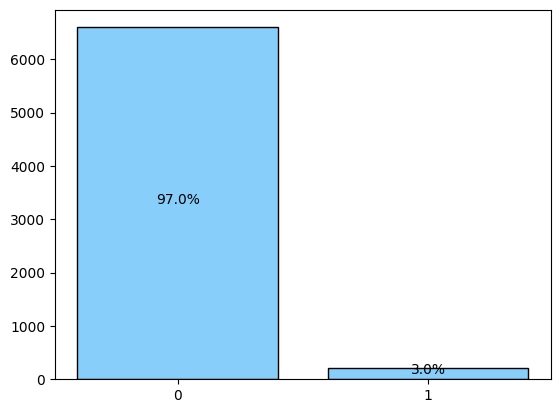

In [207]:
print(df['Bankrupt?'].value_counts())
data_distribution(df, 'Bankrupt?')

явно выделяется доминирующий и миноритарный классы

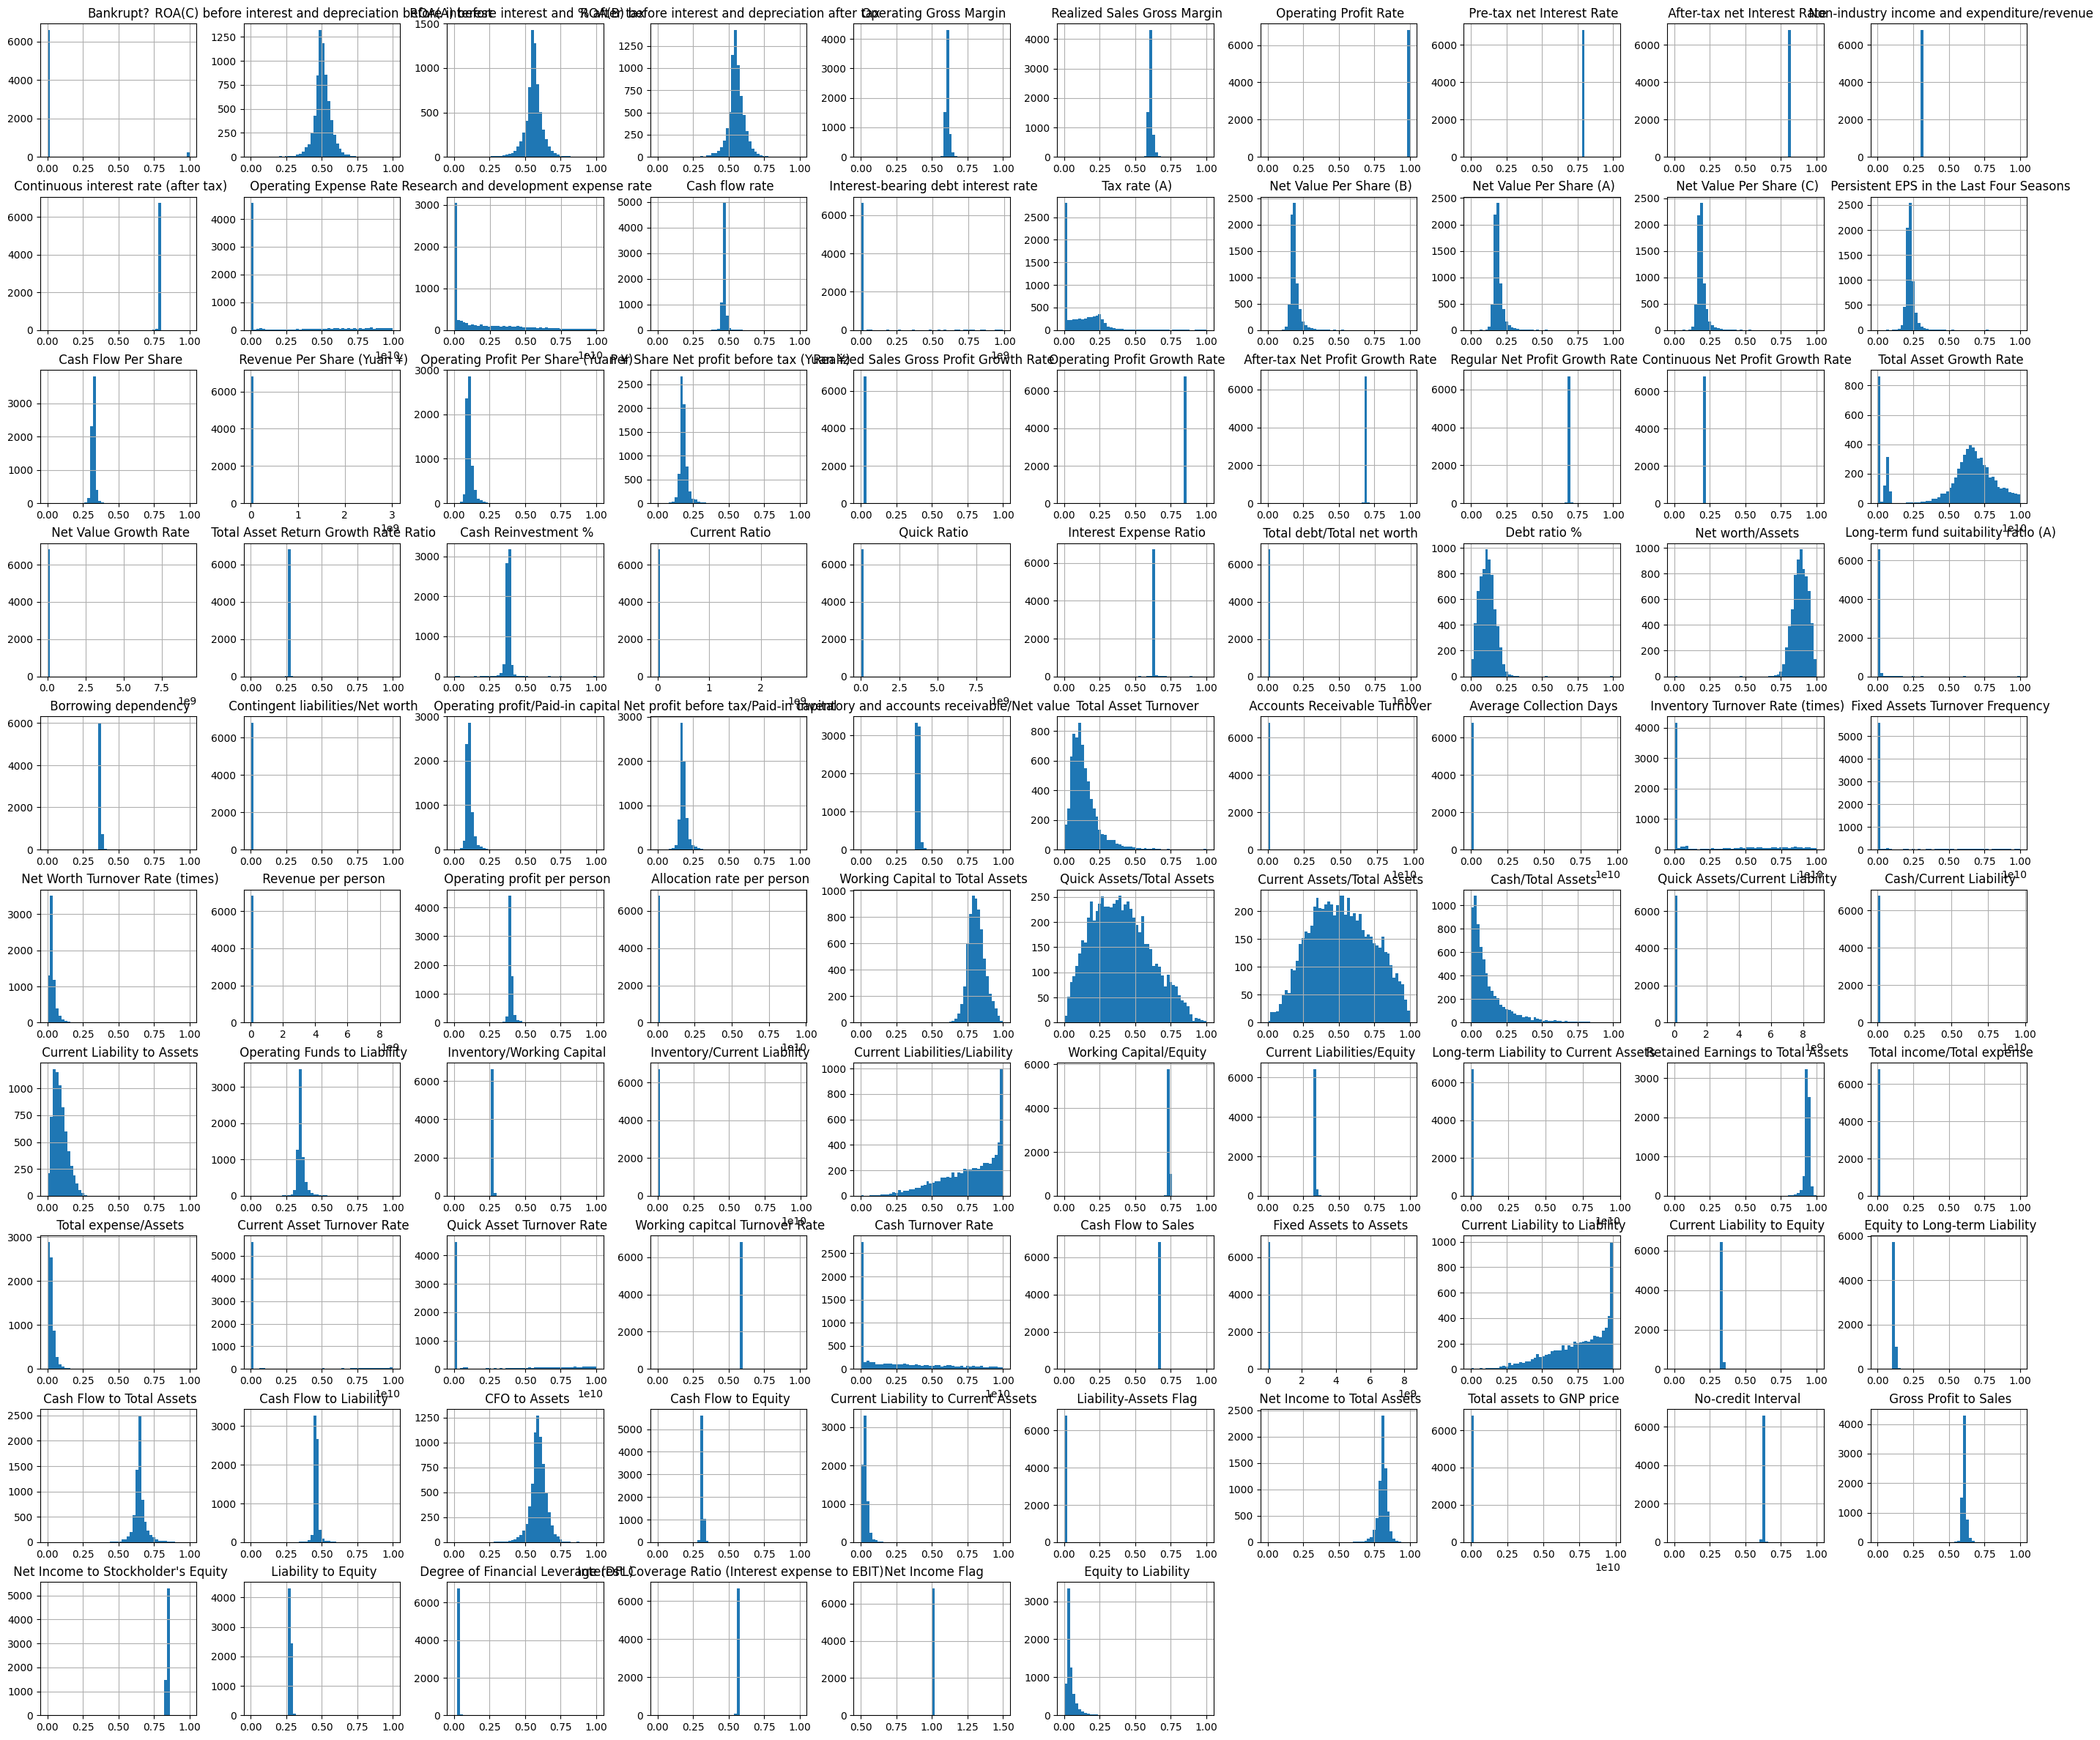

In [208]:
df.hist(figsize = (35,30), bins = 50)
plt.show()

по некоторым графикам также кажется, что некоторые признаки содержат только одно уникальное значение. уберем все такие признаки - они не несут никакой информации

In [209]:
print(df.columns[df.nunique() <= 1].tolist())
df = df.loc[:, df.nunique() > 1]
df.shape

[' Net Income Flag']


(6819, 95)

а нет, оказалось, что такой признак только один (значит у остальный очень маленький диапазон значений)

построим кореляционные матрицы

Пирсон выявляет только линейные связи

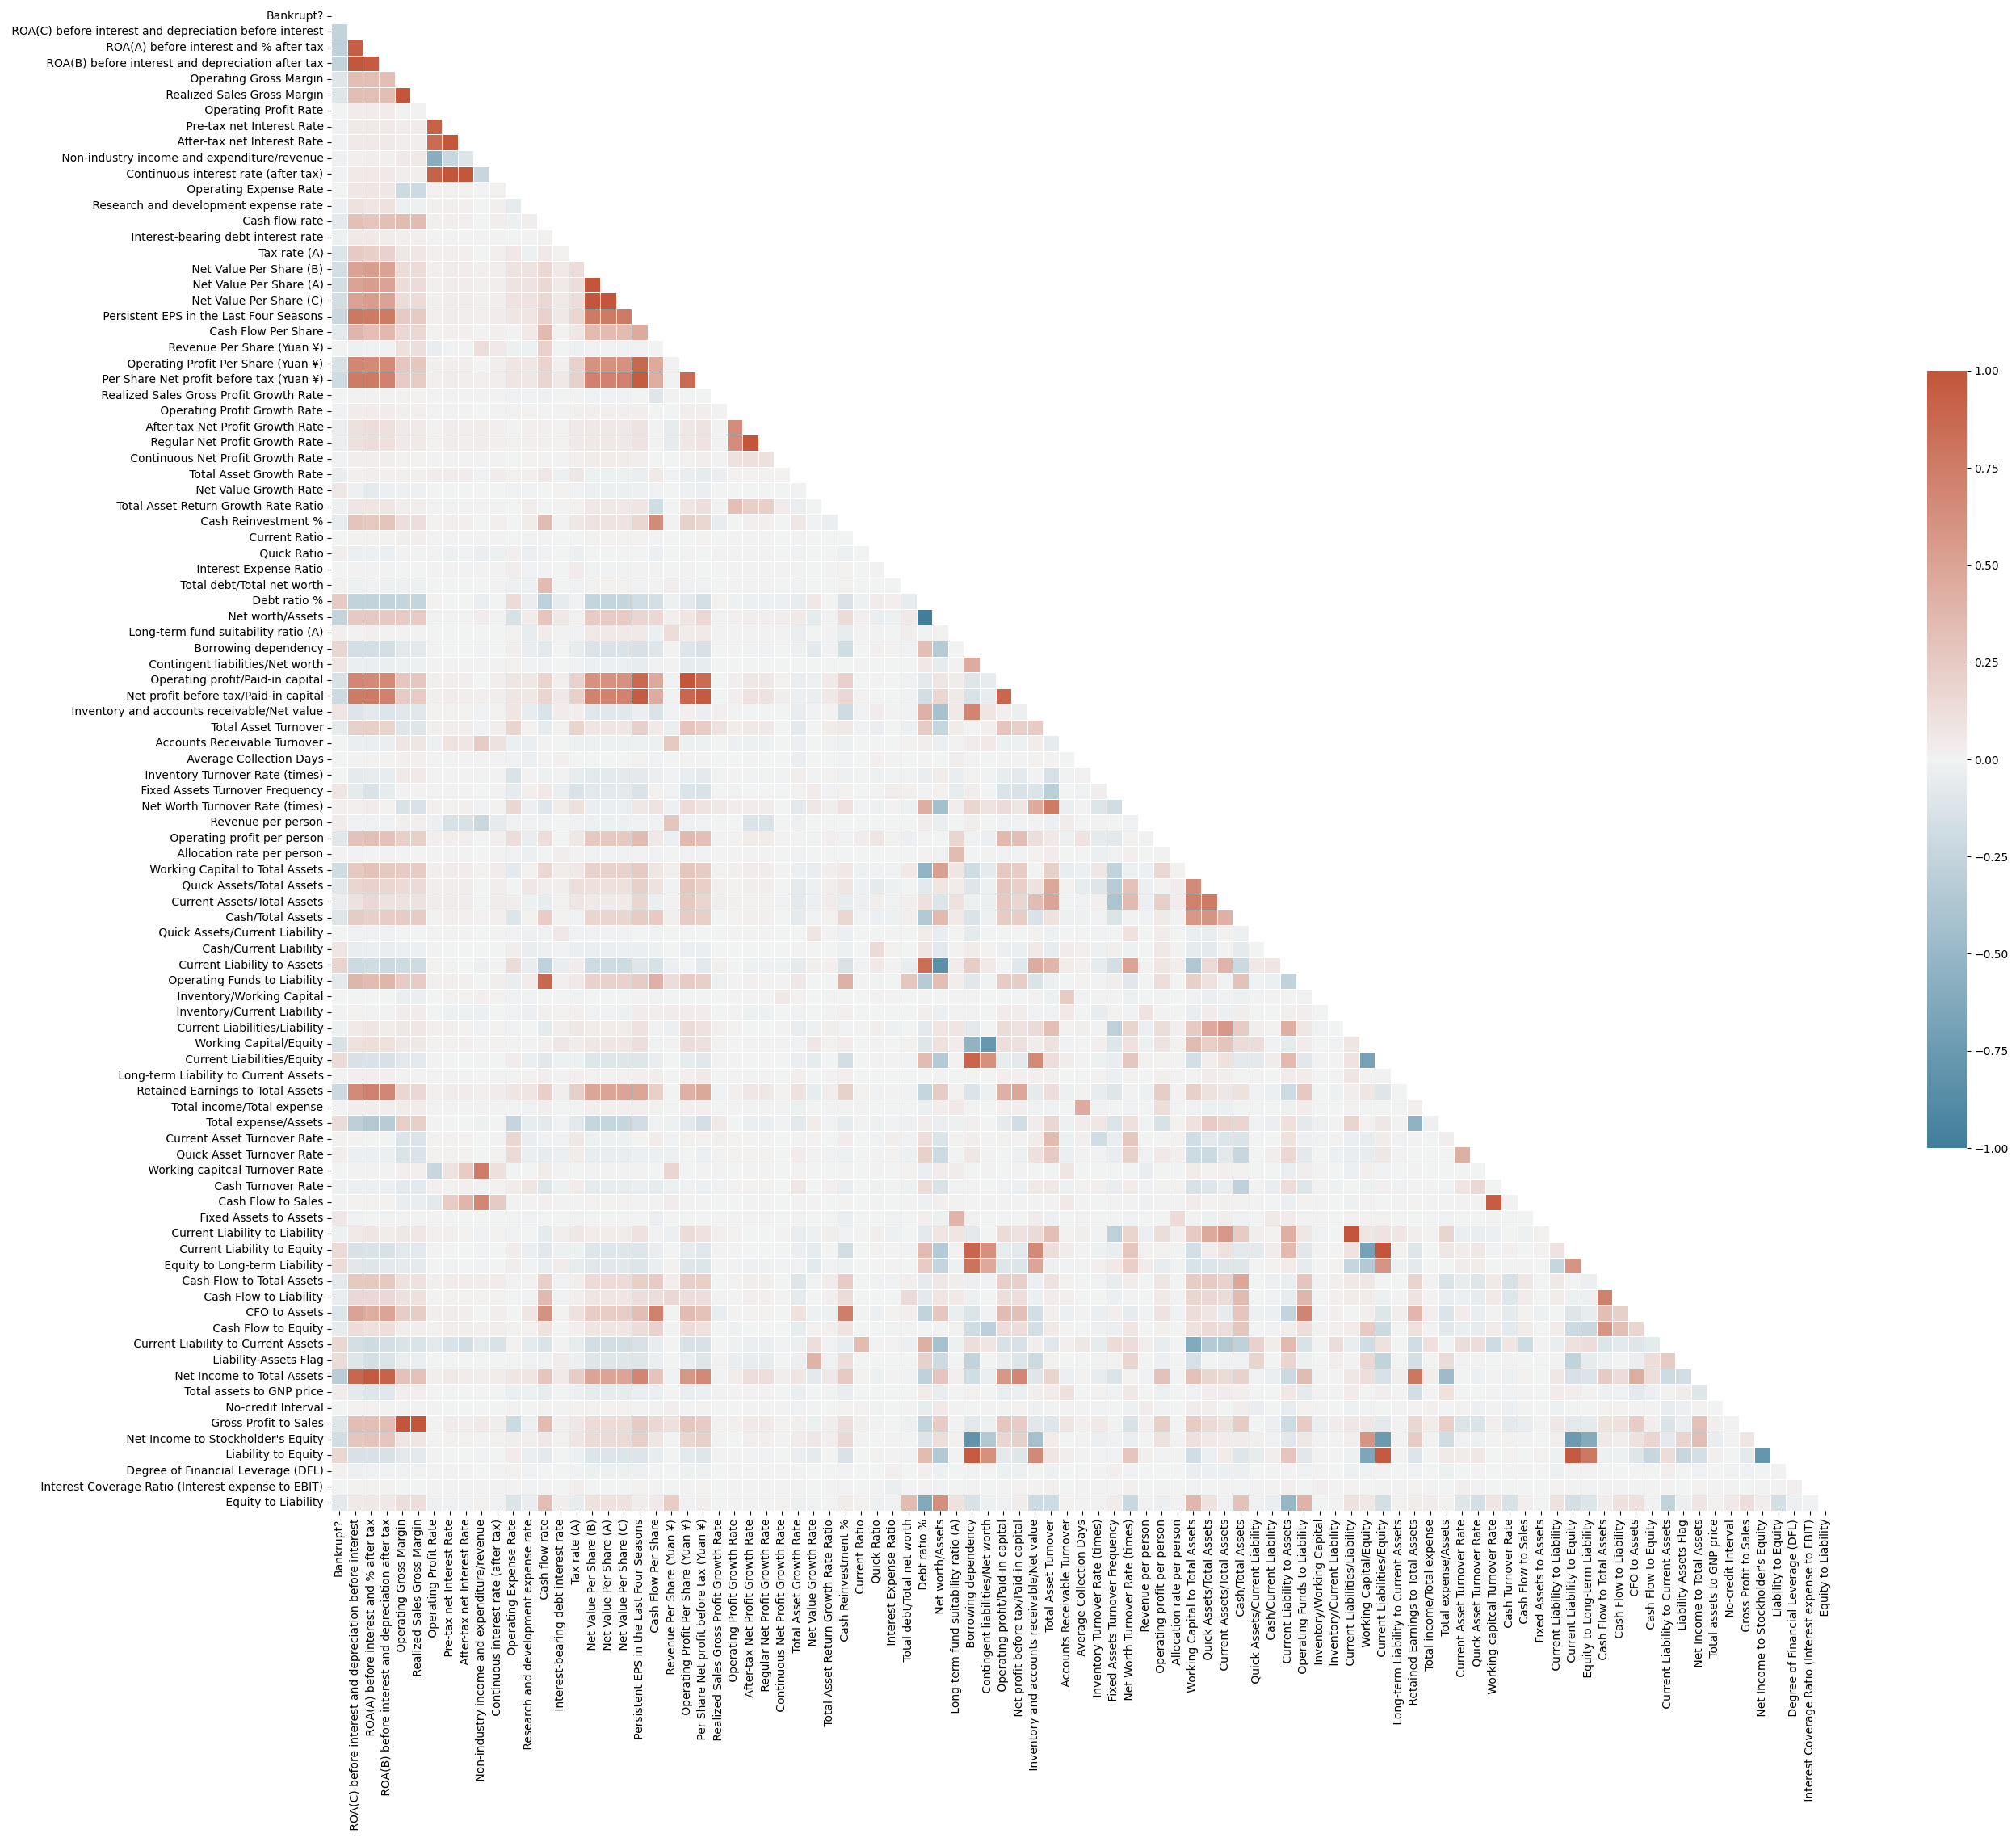

In [210]:
# Correlation Heatmap (Pearson)

f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Спирмен - выяляет монотонные нелинейные связи (построен на рангах)

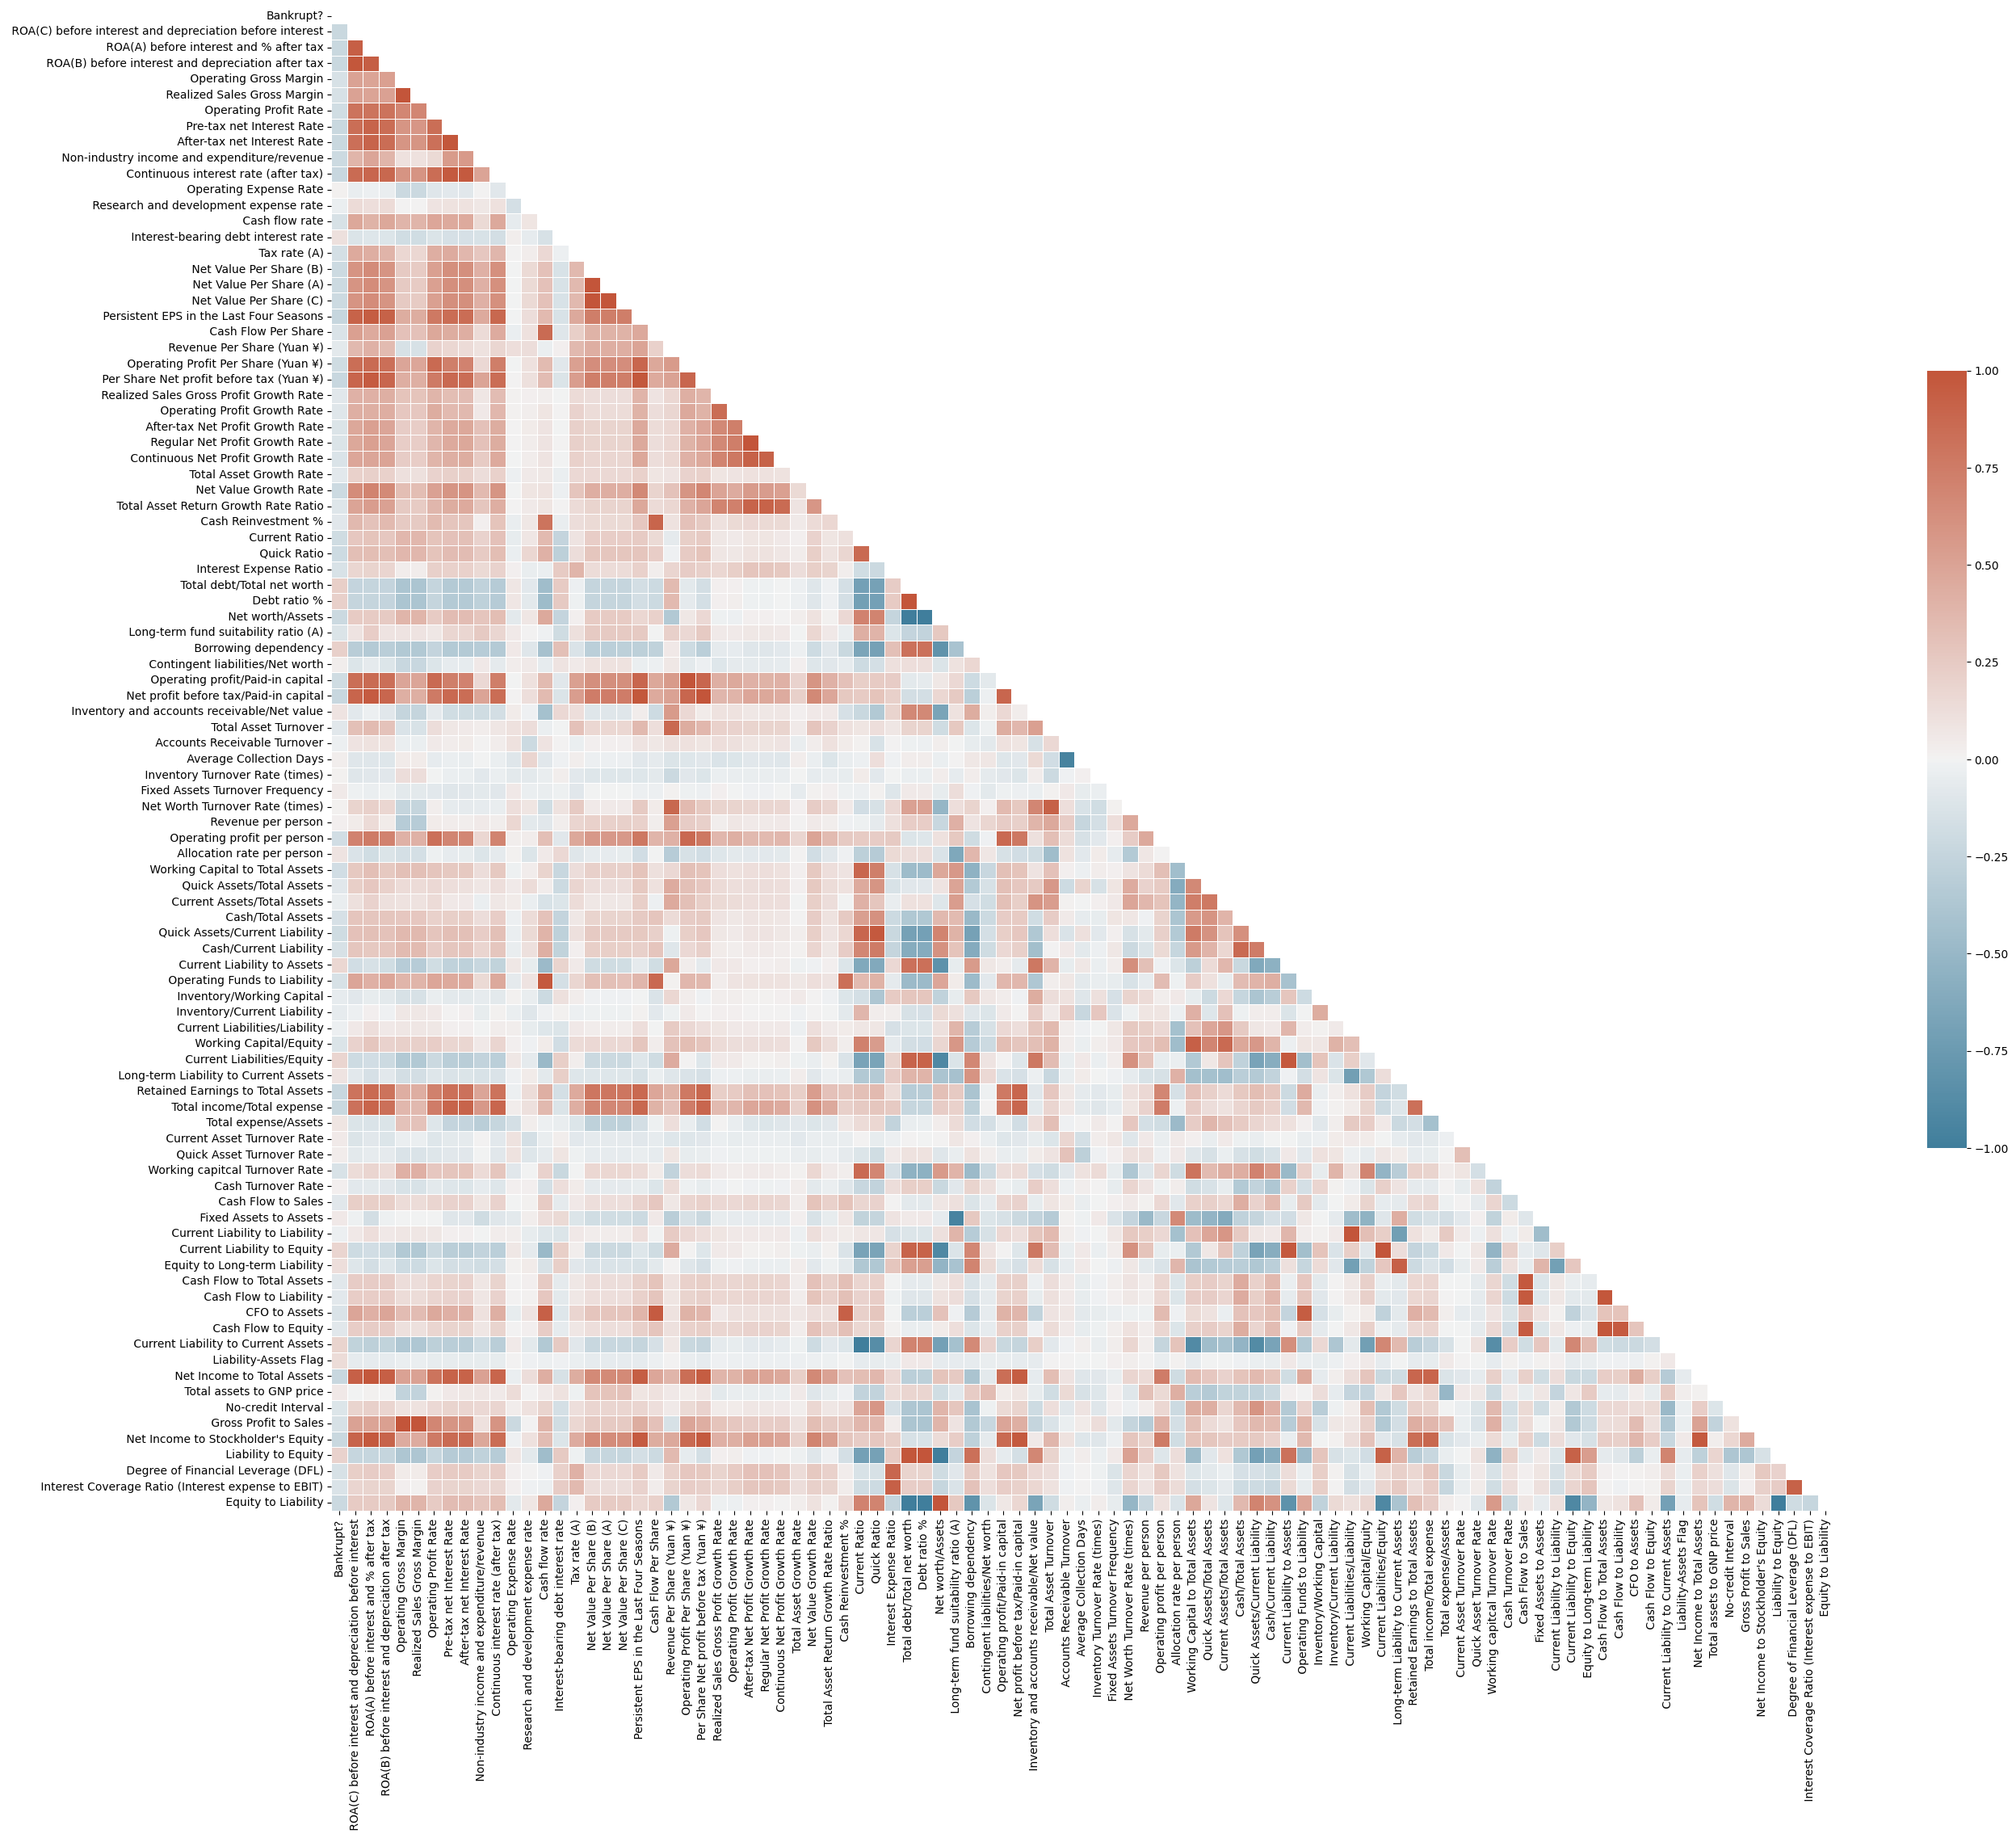

In [211]:
# Correlation Heatmap (Spearman)

f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

видно, что нелинейных связей больше (как положительных, так и отрицательных)

построим боксплоты

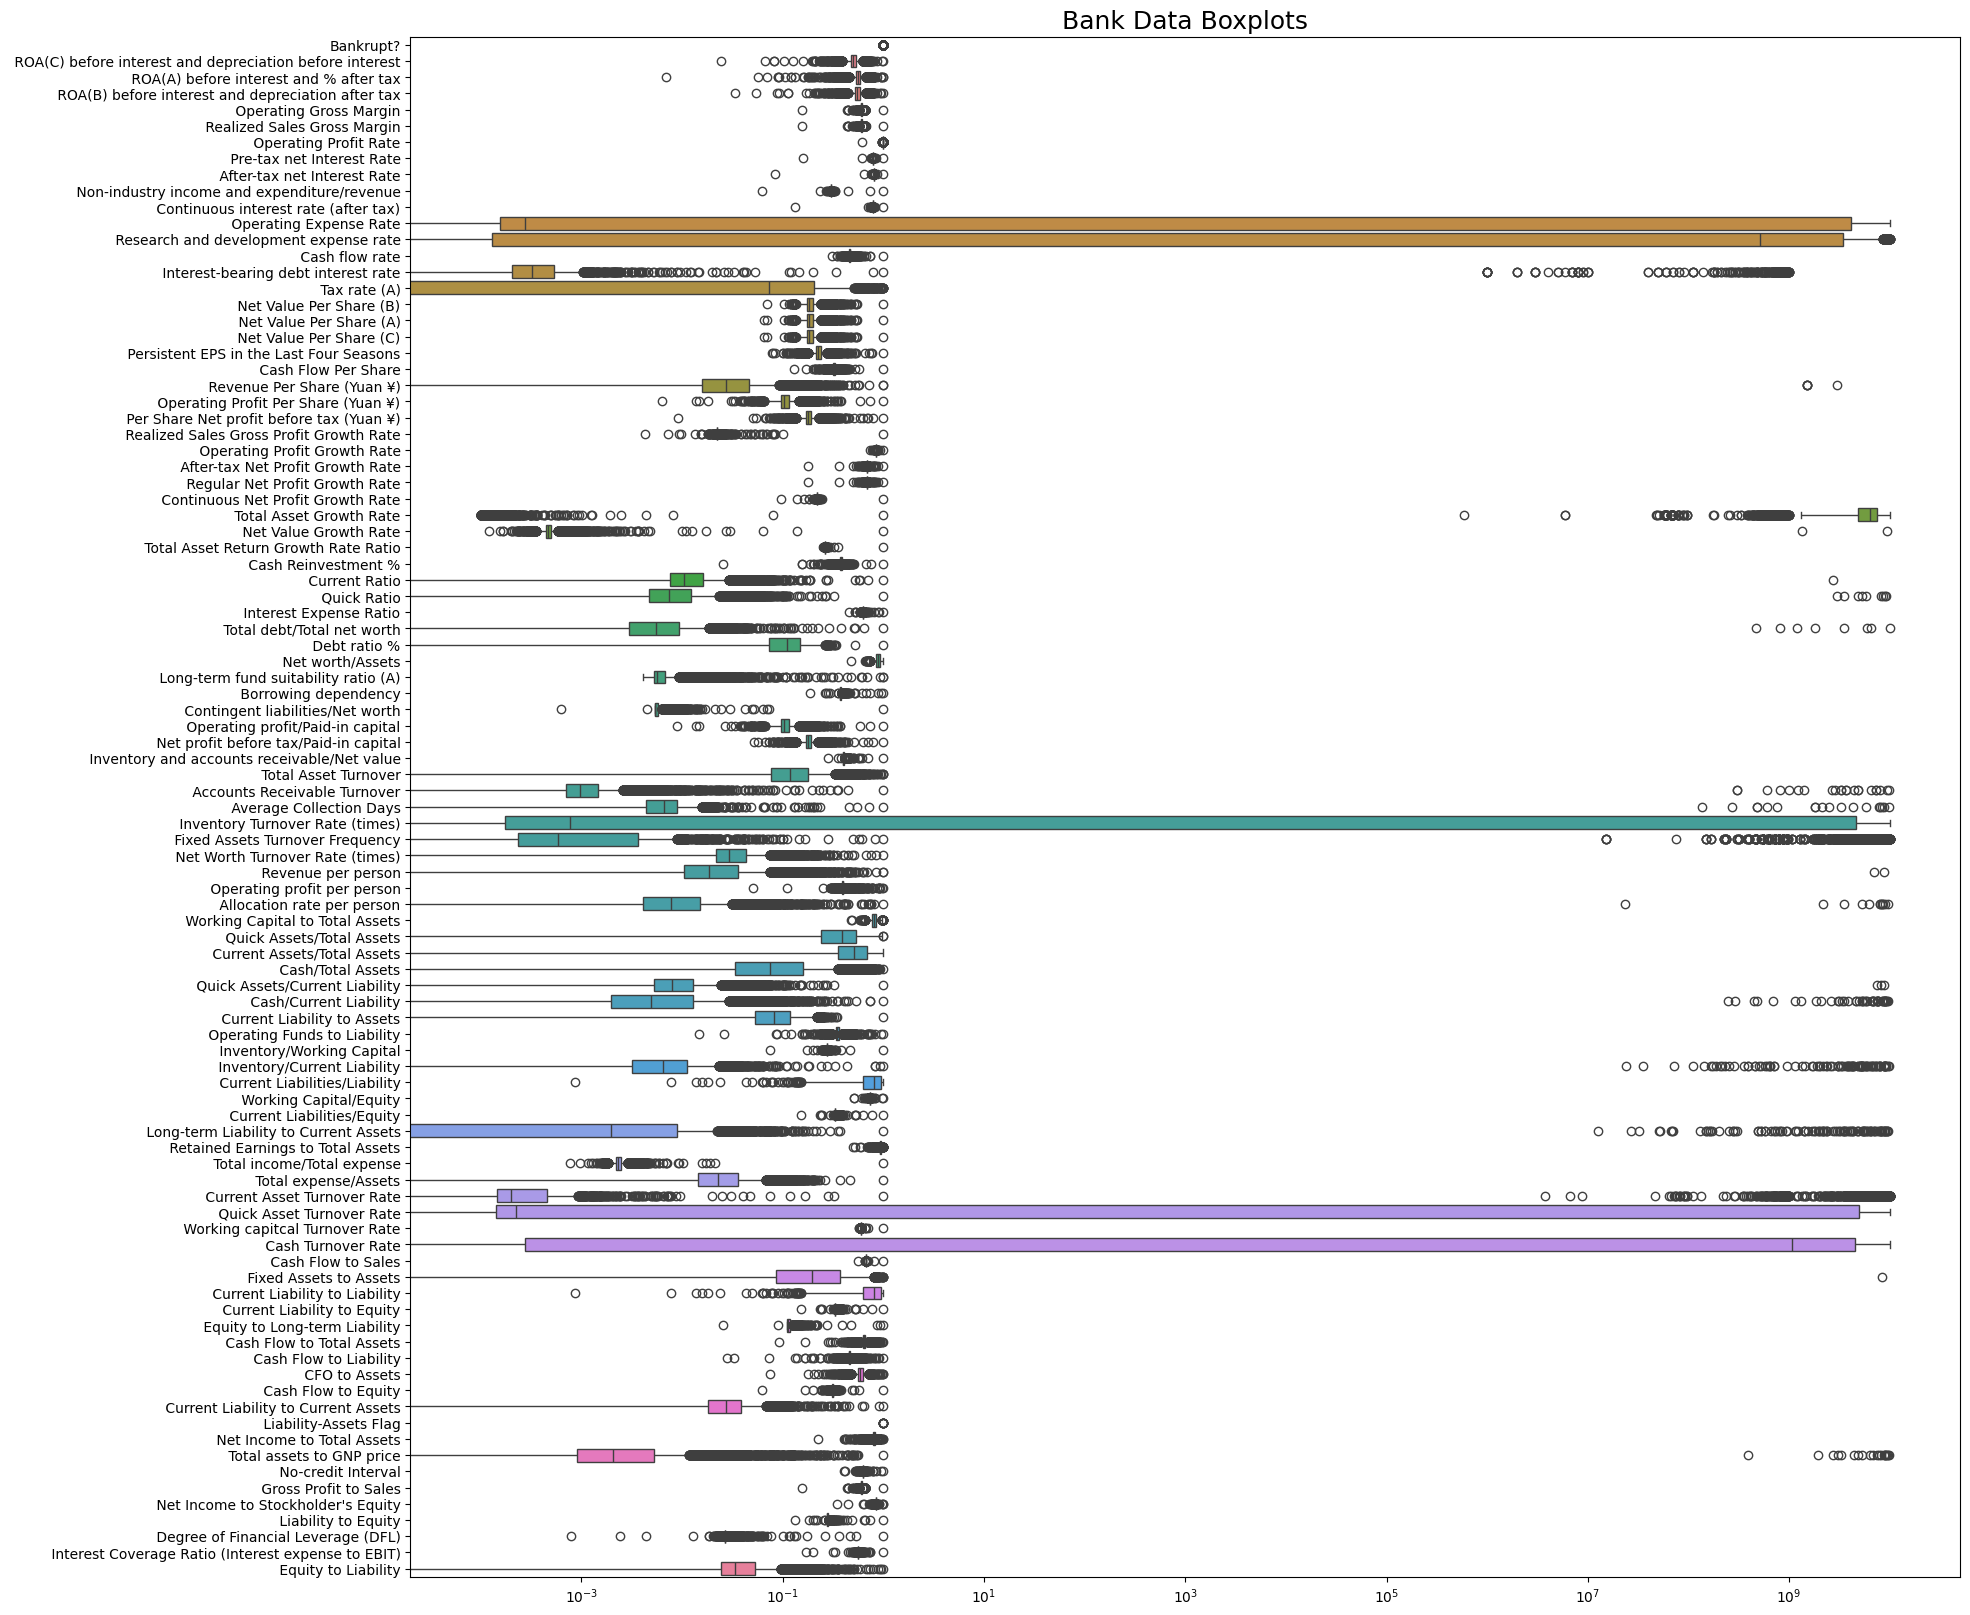

In [212]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

данные в разном масштабе

# 3. Scaling data

In [213]:
scaler = StandardScaler()
scaled_df =  pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:]) # таргет стандартизировать не надо
scaled_df.describe()

ROA(C) before interest and depreciation before interest  \
count                                          6819.0000         
mean                                             -0.0000         
std                                               1.0001         
min                                              -8.3251         
25%                                              -0.4722         
50%                                              -0.0408         
75%                                               0.5007         
max                                               8.1544         

       ROA(A) before interest and % after tax  \
count                               6819.0000   
mean                                   0.0000   
std                                    1.0001   
min                                   -8.5136   
25%                                   -0.3518   
50%                                    0.0179   
75%                                    0.4653   
max                                    6.7267   

       ROA(B) before interest and depreciation after tax  \
count                                          6819.0000   
mean                                             -0.0000   
std                                               1.0001   
min                                              -8.9882   
25%                                              -0.4272   
50%                                              -0.0213   
75%                                               0.4955   
max                                               7.2481   

       Operating Gross Margin  Realized Sales Gross Margin  \
count               6819.0000                    6819.0000   
mean                   0.0000                      -0.0000   
std                    1.0001                       1.0001   
min                  -35.9041                     -35.9406   
25%                   -0.4431                      -0.4431   
50%                   -0.1152                      -0.1155   
75%                    0.3523                       0.3496   
max                   23.1537                      23.1791   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count              6819.0000                  6819.0000   
mean                 -0.0000                    -0.0000   
std                   1.0001                     1.0001   
min                 -76.7737                   -61.9511   
25%                   0.0165                     0.0152   
50%                   0.0205                     0.0213   
75%                   0.0261                     0.0302   
max                   0.0957                    15.7608   

       After-tax net Interest Rate  \
count                    6819.0000   
mean                        0.0000   
std                         1.0001   
min                       -59.4929   
25%                         0.0168   
50%                         0.0214   
75%                         0.0284   
max                        14.0383   

       Non-industry income and expenditure/revenue  \
count                                    6819.0000   
mean                                        0.0000   
std                                         1.0001   
min                                       -27.2000   
25%                                        -0.0140   
50%                                        -0.0087   
75%                                        -0.0034   
max                                        62.3847   

       Continuous interest rate (after tax)  ...  Liability-Assets Flag  \
count                             6819.0000  ...              6819.0000   
mean                                -0.0000  ...                -0.0000   
std                                  1.0001  ...                 1.0001   
min                                -61.6325  ...                -0.0343   
25%                                  0.0146  ...                -0.0343   
50%                                  0.0200  ...          

In [214]:
scaled_df = pd.concat([df.iloc[:, 0], scaled_df], axis=1)
scaled_df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                            -2.2179          
1             1                                            -0.6738          
2             1                                            -1.3037          
3             1                                            -1.7359          
4             1                                            -0.6618          
...         ...                                                ...          
6814          0                                            -0.1894          
6815          0                                            -0.4947          
6816          0                                            -0.5348          
6817          0                                             0.0179          
6818          0                                            -0.1998          

       ROA(A) before interest and % after tax  \
0                                     -2.0458   
1                                     -0.3111   
2                                     -0.9084   
3                                     -1.6362   
4                                     -0.3077   
...                                       ...   
6814                                  -0.2920   
6815                                  -0.3102   
6816                                  -0.3792   
6817                                   0.0196   
6818                                   0.1750   

       ROA(B) before interest and depreciation after tax  \
0                                               -2.4004    
1                                               -0.5984    
2                                               -1.3199    
3                                               -1.5563    
4                                               -0.5080    
...                                                 ...    
6814                                            -0.1682    
6815                                            -0.4776    
6816                                            -0.5350    
6817                                             0.0074    
6818                                            -0.0656    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                     -0.3833                       -0.3826   
1                      0.1351                        0.1363   
2                     -0.3838                       -0.3882   
3                     -1.4414                       -1.4418   
4                     -0.5412                       -0.5407   
...                       ...                           ...   
6814                  -0.2063                       -0.2050   
6815                  -0.5693                       -0.5688   
6816                   0.1474                        0.1350   
6817                  -0.0058                       -0.0047   
6818                   1.1493                        1.1516   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                     0.0165                     -0.0235   
1                     0.0147                      0.0148   
2                     0.0079                     -0.0611   
3                    -0.0043                     -0.0173   
4                     0.0168                      0.0137   
...                      ...                         ...   
6814                  0.0182                      0.0170   
6815                  0.0182                      0.0175   
6816                  0.0176                      0.0164   
6817                  0.0245                      0.0241   
6818                 -0.0519                      0.3728   

       After-tax net Interest Rate  \
0                          -0.0202   
1                           0.0160   
2                          -0.0512   
3                          -0.0087   
4                           0.0162   
...                            ...   
6814                       

# 4. Outliers removal

хотим удалить дубликаты, если делать это одномерными способами (3-сигмы или межквартильный размах), то после применения методов к каждому признаку (которых у нас много) мы потеряем много информации. поэтому воспользуемся **расстоянием Махаланобиса**, который определяет далекие точки в многомерном пространстве, более того данный способ устойчив к высокой корреляции в данных

In [215]:
def remove_outliers_mahalanobis(data, threshold=0.99): # threshold - уровень доверия (по умолчанию 0.99 — выбросы выше 99% квантиля)
    mu = data.mean().values # вектор средних значений
    cov = np.cov(data.values, rowvar=False) # ковариоционная матрица
    cov_inv = np.linalg.pinv(cov)  # используем псевдообратную матрицу тк обратная вырожденная на скореллированных данных
    # расстояние от семпла до вектора средних
    diff = data.values - mu
    md_squared = np.einsum('ij,jk,ik->i', diff, cov_inv, diff)
    # порог отсечения (квантиль chi2-распределения)
    chi2_threshold = chi2.ppf(threshold, df=data.shape[1])
    # фильтрация выбросов
    mask = md_squared < chi2_threshold
    print(f"Оставлено строк: {mask.sum()} из {len(data)}")

    return data[mask].copy()

In [216]:
clean_df = remove_outliers_mahalanobis(scaled_df)

Оставлено строк: 6322 из 6819


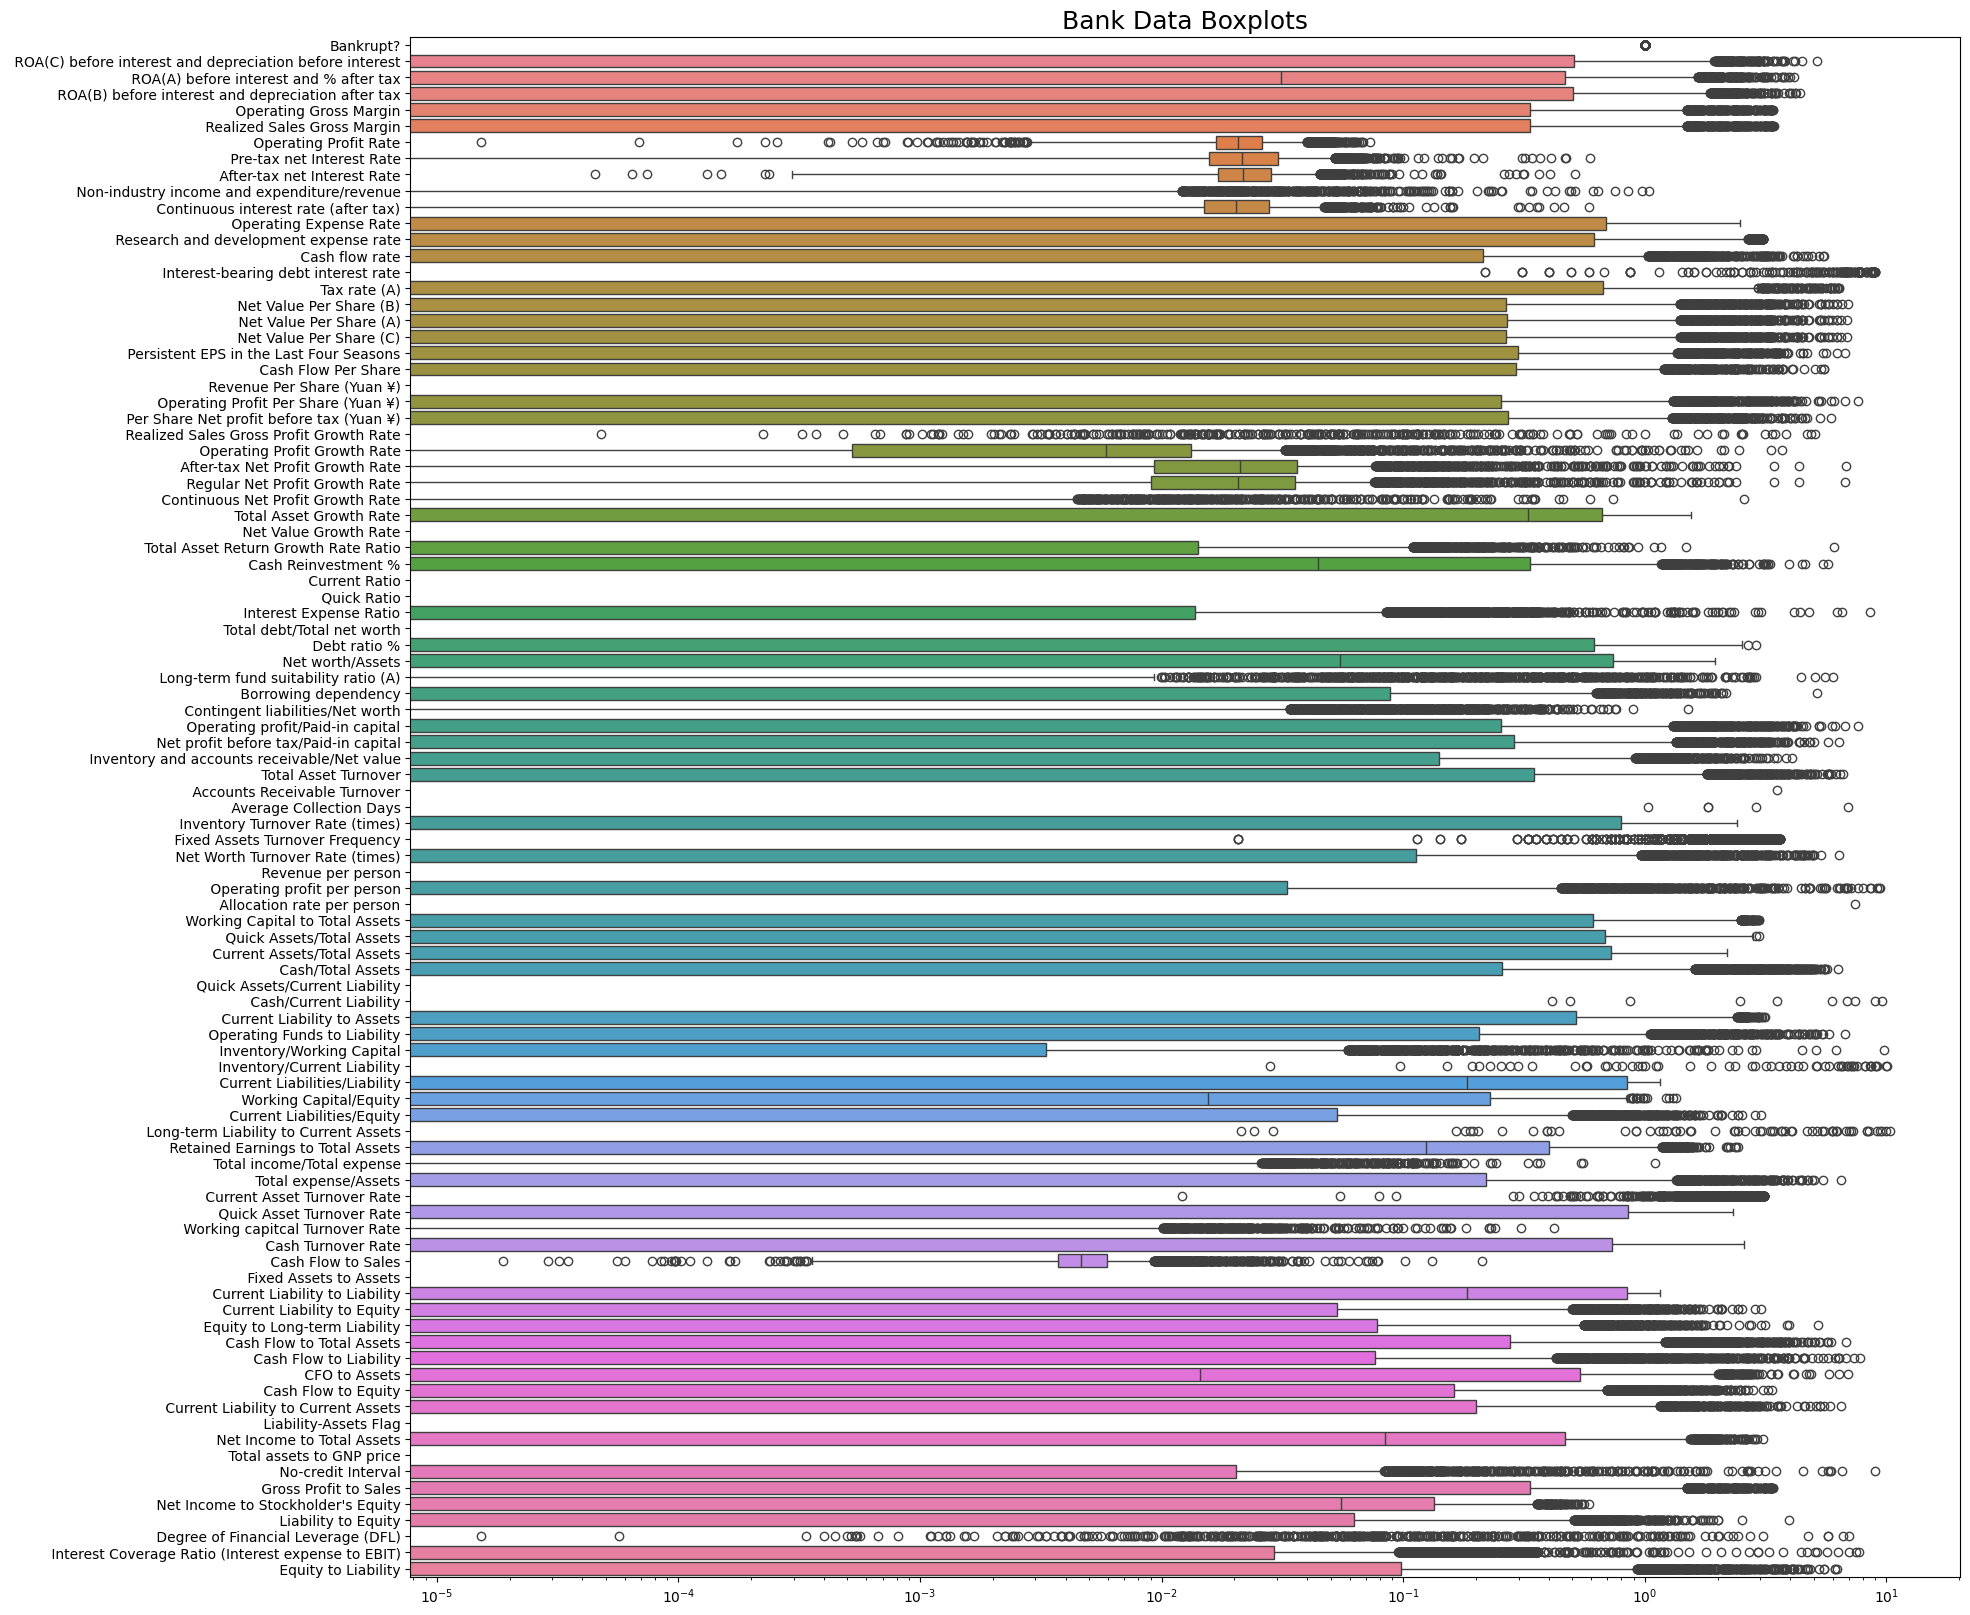

In [217]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = clean_df, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

сейчас выглядит приятнее!

# 5. Modeling (baseline)

делим данные на обучающую и тестовую выборку, обязательной стратифицируем таргет!

In [218]:
X =  clean_df.iloc[:, 1:]
y = clean_df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

строим модели (без настройки параметров) и выводим скор на трейне (это accuracy)

In [219]:
lr = LogisticRegression()
lr.fit(X_train, y_train)


svm = SVC()
svm.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

models = {'LogReg': lr, 'SVM': svm, 'RandomForest': rf}

for name, model in models.items():
    print(f"\n{name}:")
    print("Train Score:", model.score(X_train, y_train))
    print("Test Score: ", model.score(X_test, y_test))


LogReg:
Train Score: 0.9762705161162745
Test Score:  0.974703557312253

SVM:
Train Score: 0.9750840419220882
Test Score:  0.974703557312253

RandomForest:
Train Score: 1.0
Test Score:  0.9715415019762846


значения ожидаемое возле числа 0.97. константная модель, которая всегда предсказывает доминирующий класс, имела такие же значения метрик. посмотрим подробный репорт по метрикам на тесте

In [220]:
models = {'LogReg': lr, 'SVM': svm, 'RandomForest': rf}

for name, model in models.items():
    print(f"\n{name}:")
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, zero_division=0.0)
    print(report)


LogReg:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1233
           1       0.50      0.19      0.27        32

    accuracy                           0.97      1265
   macro avg       0.74      0.59      0.63      1265
weighted avg       0.97      0.97      0.97      1265


SVM:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1233
           1       0.00      0.00      0.00        32

    accuracy                           0.97      1265
   macro avg       0.49      0.50      0.49      1265
weighted avg       0.95      0.97      0.96      1265


RandomForest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1233
           1       0.25      0.06      0.10        32

    accuracy                           0.97      1265
   macro avg       0.61      0.53      0.54      1265
weighted avg       0.96      0.97      0.96 

здесь видно, что svm вобще игнорирует миноритарный класс. нам важно, чтобы класс "1" был учтен, при этом метрики precision и recall считаем равноценными. **будем оценивать модели по метрике f1-macro** (одинаковый вес для классов)

выбираем модель логистической регрессии и далее будем тюнить ее

In [221]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

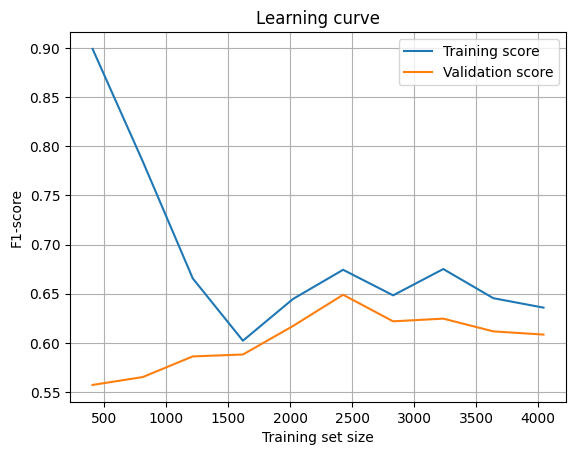

In [222]:
train_sizes, train_scores, test_scores = learning_curve(
    lr, X_train, y_train,
    cv=5, scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Средние значения
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# График
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Validation score")
plt.ylabel("F1-score")
plt.xlabel("Training set size")
plt.legend(loc="best")
plt.title("Learning curve")
plt.grid(True)
plt.show()

графики достаточно близки (дельта < 0.05)

# 6. Dimensionality reduction

## PCA

In [223]:
# сначала подбираем нужное количество компонент
pca_full = PCA()
X_train_full = pca_full.fit_transform(X_train)
pca_full.explained_variance_ratio_

array([2.34609007e-01, 1.21459396e-01, 9.79873916e-02, 5.18493668e-02,
       4.53922807e-02, 4.24777282e-02, 3.60286304e-02, 3.02334837e-02,
       2.83796907e-02, 2.72334682e-02, 2.50853051e-02, 2.38335899e-02,
       2.31198541e-02, 2.27685820e-02, 2.12470708e-02, 1.95713783e-02,
       1.71127349e-02, 1.58471246e-02, 1.20401678e-02, 1.01352015e-02,
       9.82942911e-03, 8.46458122e-03, 7.67570753e-03, 6.86690561e-03,
       5.96584812e-03, 4.88537941e-03, 4.65661099e-03, 4.31075894e-03,
       4.17310022e-03, 3.75377700e-03, 3.04327361e-03, 2.88669833e-03,
       2.75722510e-03, 2.55013372e-03, 2.37976305e-03, 2.28028575e-03,
       2.05836922e-03, 1.48238931e-03, 1.43269254e-03, 1.36034827e-03,
       1.31379210e-03, 1.16251294e-03, 1.06495541e-03, 1.00963380e-03,
       8.13765975e-04, 6.49750979e-04, 5.66694695e-04, 5.55901318e-04,
       4.46102212e-04, 4.18836715e-04, 3.91888999e-04, 3.43558165e-04,
       3.37396578e-04, 2.77389023e-04, 2.16237427e-04, 2.11670016e-04,
      

по значениям видно, что они небольшие, то есть нам все равно понадобиться достаточно много компонент. это говорит о низкой линейной зависимости между компонентами и тагетом. визуализируем

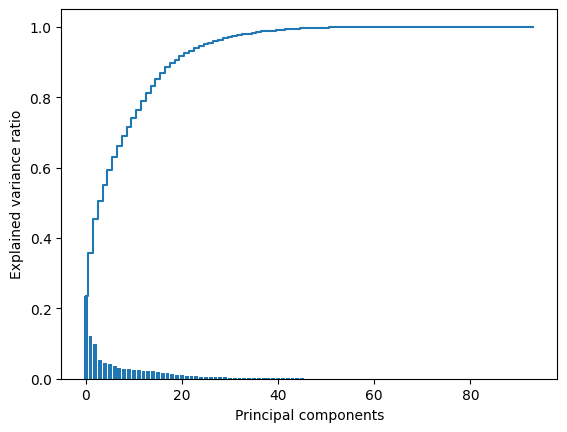

In [224]:
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.bar(range(0, 94), pca_full.explained_variance_ratio_, align='center')
plt.step(range(0, 94), cumulative_variance, where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [225]:
# находим количество компонент, объясняющих ≥95% дисперсии
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Число компонент для 95% дисперсии: {n_components_95}")

Число компонент для 95% дисперсии: 26


In [226]:
# теперь применяем PCA с нужным числом компонент
pca = PCA(n_components=n_components_95)
X_train_pca = pca.fit_transform(X_train)  # X_train_pca теперь содержит только нужные компоненты
pd.DataFrame(X_train_pca)

0       1       2       3       4       5       6       7       8   \
0     1.1548 -1.9846  5.3504  2.5707  2.7695  5.1684  0.7639  1.3920  0.1709   
1     1.4714  0.2620 -0.0195  1.3689  0.7117 -0.6796  0.3243 -0.9884 -0.2569   
2    -2.0129  0.4795 -1.0362  1.5982  0.6666  0.7280 -1.1164 -0.3891 -0.0762   
3    -4.3573  1.9743  1.6527  2.0829 -0.1266 -1.9741  1.0444 -0.5416 -0.0837   
4    -5.3545 -3.6791 -0.8614  0.6559  0.7880  0.4594  0.7837 -1.7845  0.5511   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
5052  1.3254  0.6231  2.9554  2.3626  0.0933  0.0950  0.3595 -1.2496 -0.2414   
5053  2.5800 -0.0957  3.1236 -0.7628 -0.2865  3.4435  0.7736  2.2867  0.9989   
5054 -0.9922 -3.3370 -3.7514 -0.1542 -1.6262  0.0989 -0.8760  0.0855  0.3784   
5055  2.1227  1.1727  0.6602 -2.2435 -1.4616  1.9149 -0.9055  0.7828  1.1948   
5056 -0.4251  4.1831 -1.4030 -1.7529 -0.4328  0.2833 -1.3354  0.1783 -0.7271   

          9   ...      16      17      18      19      20      21      22  \
0     0.1272  ...  1.3490  0.7054  0.9468 -1.3088  1.2524  2.3453 -0.4669   
1     0.6911  ... -0.0509  1.4029 -1.1522 -0.2450  0.0247 -0.4698 -0.0357   
2     1.6845  ... -1.1284 -1.1077  1.2034  0.0028 -0.1272 -0.2437  0.1362   
3     0.3974  ...  0.0409  0.5882 -0.4191  0.1223 -1.1579  0.5082 -0.2879   
4     0.4171  ...  0.1056  1.3493 -1.3196  0.1698 -0.9660  0.7251 -0.1233   
...      ...  ...     ...     ...     ...     ...     ...     ...     ...   
5052 -0.3893  ... -0.8555  0.1585 -0.7191 -0.0832  0.0150 -0.2275 -0.1999   
5053  1.4033  ... -0.1069 -0.1608  0.5301  1.0937  2.0054 -0.8577  0.1077   
5054  2.2025  ... -0.4869  0.4784 -0.4136 -0.2256  0.4983 -0.3313  0.2373   
5055 -1.2639  ... -0.8373  0.5480  0.3711  1.6886  1.2053 -0.0496  0.0426   
5056 -0.1927  ... -0.0085  1.1528 -0.4444 -0.7899  0.2771  0.8437 -0.0286   

          23      24      25  
0     0.1919 -0.7048  0.2265  
1    -0.0847 -0.0196 -0.2040  
2    -0.0348  0.3878  0.0213  
3    -0.1370 -0.0936  0.4072  
4    -0.0408  0.0922  0.2298  
...      ...     ...     ...  
5052 -0.0939  0.1265 -0.1623  
5053  0.0696  0.5906 -0.2836  
5054  0.0713  0.2212  0.0101  
5055  0.0435  0.0385 -0.1706  
5056 -0.0004  0.0685 -0.0036  

[5057 rows x 26 columns]

## LDA

In [227]:
lda = LDA()
X_train_lda = lda.fit_transform(X_train, y_train)

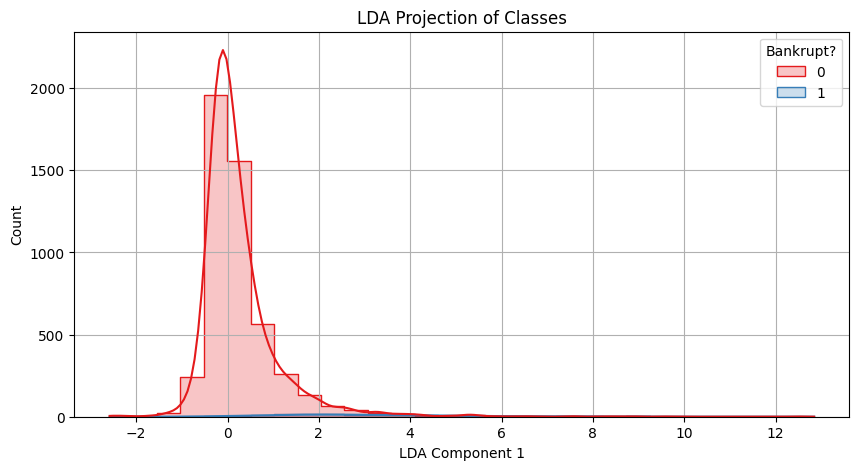

In [228]:
plt.figure(figsize=(10, 5))
sns.histplot(x=X_train_lda[:, 0], hue=y_train, bins=30, kde=True, palette="Set1", element="step")
plt.xlabel('LDA Component 1')
plt.title('LDA Projection of Classes')
plt.grid(True)
plt.show()

графики сильно перекрывают друг друга, данные линейно не разделимы (как мы поняли и раннее)

## TSNE

посмотрим в 2D

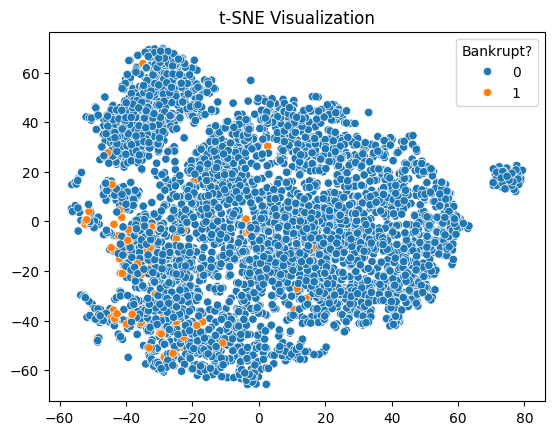

In [229]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X_train)

sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_train)
plt.title("t-SNE Visualization")
plt.show()

а теперь в 3D

In [230]:
tsne = TSNE(n_components=3, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X_train)
# Создание DataFrame из t-SNE результатов и меток
data3d = pd.concat([pd.DataFrame(X_embedded, columns=['x', 'y', 'z']), y_train.reset_index(drop=True).rename("target")], axis=1)
# Интерактивный 3D-график
fig = px.scatter_3d(data3d, x='x', y='y', z='z', color=data3d['target'].astype(str),
                    title='3D t-SNE', opacity=0.7, width=800, height=600)
fig.show()

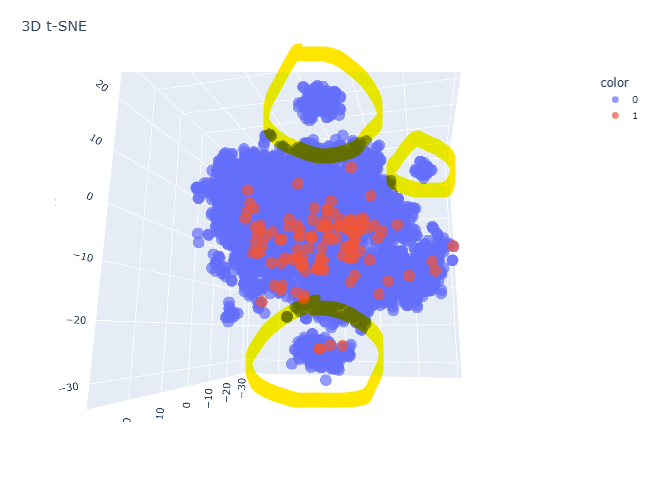

если покрутить, то видно, что выделяются облака точек, которые хочется выделить в отдельный кластер, но они принадлежат доминирующему классу. в миноритарный класс лежит внутри большого облака точек.

# 7. Cluster analysis

## KMeans

применим к данным после PCA-reduction и оценим с помощью silhouette score (мера того, насколько близка точка к точкам своего кластера и насколько далека от ближайшего кластера)

In [231]:
# предсказываем кластеры
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_train_pca)

# оценим качество кластеризации (silhouette score)
score = silhouette_score(X_train_pca, clusters)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.139


данные плохо кластеризуются

применим к данным после LDA-reduction

In [232]:
# предсказываем кластеры
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_train_lda)

# оценим качество кластеризации (silhouette score)
score = silhouette_score(X_train_lda, clusters)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.770


несмотря на хорошее значение, мы понимаем,  что оно достигнуто за счет сильного дисбаланса в данных. возможно, кластеры плотны отдносительно себя, но миноритарный класс содержится глубоко в доминирующем (за счет того, что точек 0-го класса больше, скор не сильно ухудшается)

##DBSCAN

применим к данным после TSNE

In [233]:
# предсказываем кластеры
dbscan = DBSCAN(eps=4.1, min_samples=5)
clusters = dbscan.fit_predict(X_embedded)

tsne_df = pd.DataFrame(X_embedded, columns=['x', 'y', 'z'])
tsne_df['cluster'] = clusters

fig = px.scatter_3d(tsne_df, x='x', y='y', z='z', color='cluster',
                    title='DBSCAN + t-SNE (3D)', opacity=0.7, width=800, height=600)
fig.show()

значение eps подобрано так, чтобы доминирующий кластер (который, очевидно, соответсвует классу "0") содержался в том же процентном отношении, что и датасете

In [234]:
# подсчет количества объектов в каждом кластере
unique, counts = np.unique(clusters, return_counts=True)

for label, count in zip(unique, counts):
    print(f"Кластер {label}: {count} объектов ({count / len(clusters):.3f}%)")

Кластер -1: 30 объектов (0.006%)
Кластер 0: 4893 объектов (0.968%)
Кластер 1: 17 объектов (0.003%)
Кластер 2: 87 объектов (0.017%)
Кластер 3: 9 объектов (0.002%)
Кластер 4: 21 объектов (0.004%)


видим те же кластеры, что мы заприметили и при визуализации TSNE. но, как помним, это ошибочное выделение, поскольку реальный "1" класс распределен внутри большого облака

# 8. Modeling (hyperparameter tuning)

работаем с данными после PCA

In [235]:
scaled_X_train_pca =  pd.DataFrame(scaler.fit_transform(X_train_pca))

применим андерсемплинг, но чтобы не было сильного шума, пусть отношение классов будет 1:10

In [236]:
undersampler = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(scaled_X_train_pca, y_train)

In [237]:
print(pd.DataFrame(y_resampled).value_counts())

Bankrupt?
0            1280
1             128
Name: count, dtype: int64


найдем лучшие гиперпараметры с помощью сетки, оптимизируя f1-macro. используем стратифицированную кросс-валидацию,

In [238]:
param_grid = {
    'max_iter': [1000, 5000],
    'C': [0.1, 1, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'class_weight': [None, 'balanced']
}
# кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
logreg = LogisticRegression()
grid = GridSearchCV(
    logreg,
    param_grid,
    scoring='f1_macro',  # или 'roc_auc'
    cv=cv,
    error_score=np.nan
)
grid.fit(X_resampled, y_resampled)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 100], 'class_weight': [None, 'balanced'],
                         'max_iter': [1000, 5000], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'saga']},
             scoring='f1_macro')

In [239]:
# лучшие параметры
print("Best parameters:")
print(grid.best_params_)

# оценка на трейне
y_pred = grid.predict(X_resampled)
print("\nClassification Report (Train):")
print(classification_report(y_resampled, y_pred))

Best parameters:
{'C': 1, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1280
           1       0.72      0.45      0.56       128

    accuracy                           0.93      1408
   macro avg       0.84      0.72      0.76      1408
weighted avg       0.93      0.93      0.93      1408



посмотрим лучшие 10 моделей

In [240]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results.sort_values('rank_test_score').head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
11         0.1562        0.0245           0.0045          0.0002   1.0000   
10         0.0092        0.0004           0.0057          0.0002   1.0000   
9          0.1583        0.0258           0.0044          0.0001   1.0000   
8          0.0094        0.0007           0.0058          0.0001   1.0000   
19         0.3028        0.1210           0.0047          0.0003 100.0000   
17         0.3056        0.1240           0.0046          0.0002 100.0000   
18         0.0110        0.0012           0.0057          0.0003 100.0000   
16         0.0113        0.0014           0.0062          0.0010 100.0000   
23         0.6734        0.6357           0.0044          0.0000 100.0000   
22         0.0800        0.0999           0.0092          0.0027 100.0000   

   param_class_weight  param_max_iter param_penalty param_solver  \
11               None            5000            l2         saga   
10               None            5000            l2        lbfgs   
9                None            1000            l2         saga   
8                None            1000            l2        lbfgs   
19               None            5000            l2         saga   
17               None            1000            l2         saga   
18               None            5000            l2        lbfgs   
16               None            1000            l2        lbfgs   
23           balanced            5000            l2         saga   
22           balanced            5000            l2        lbfgs   

                                               params  split0_test_score  \
11  {'C': 1, 'class_weight': None, 'max_iter': 500...             0.7736   
10  {'C': 1, 'class_weight': None, 'max_iter': 500...             0.7736   
9   {'C': 1, 'class_weight': None, 'max_iter': 100...             0.7736   
8   {'C': 1, 'class_weight': None, 'max_iter': 100...             0.7736   
19  {'C': 100, 'class_weight': None, 'max_iter': 5...             0.7605   
17  {'C': 100, 'class_weight': None, 'max_iter': 1...             0.7605   
18  {'C': 100, 'class_weight': None, 'max_iter': 5...             0.7605   
16  {'C': 100, 'class_weight': None, 'max_iter': 1...             0.7605   
23  {'C': 100, 'class_weight': 'balanced', 'max_it...             0.7063   
22  {'C': 100, 'class_weight': 'balanced', 'max_it...             0.7063   

    split1_test_score  split2_test_score  split3_test_score  \
11             0.7238             0.6896             0.7658   
10             0.7238             0.6896             0.7658   
9              0.7238             0.6896             0.7658   
8              0.7238             0.6896             0.7658   
19             0.7238             0.6832             0.7658   
17             0.7238             0.6832             0.7658   
18             0.7238             0.6832             0.7578   
16             0.7238             0.6832             0.7578   
23             0.7272             0.6903             0.7011   
22             0.7272             0.6903             0.7011   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
11             0.6655           0.7237          0.0420                1  
10             0.6655           0.7237          0.0420                1  
9              0.6655           0.7237          0.0420                1  
8              0.6655           0.7237          0.0420                1  
19             0.6397           0.7146          0.0478                5  
17             0.6397           0.7146          0.0478                5  
18             0.6397           0.7130          0.0461                7  
16             0.6397           0.7130          0.0461                7  
23             0.6915           0.7033          0.0134                9  
22             0.6915           0.7033          0.0134                9

выведем скоры на кросс-валидации (на пяти сплитах), а также среднее и дисперсию

In [241]:
best_scores = cv_results.sort_values('rank_test_score').loc[:, [
    'split0_test_score', 'split1_test_score', 'split2_test_score',
    'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score'
]].iloc[0]

formatted_scores = [f"{score}" for score in list(best_scores)[:-2]]

mean_score = f"{list(best_scores)[-2]}"
std_score = f"{list(best_scores)[-1]}"

print(f"F1 scores: {', '.join(formatted_scores)}")
print(f"Mean F1 score: {mean_score}")
print(f"Std F1 score: {std_score}")

F1 scores: 0.7736498108015135, 0.7238259571888261, 0.6896137682609566, 0.7657988919939207, 0.6654761904761904
Mean F1 score: 0.7236729237442814
Std F1 score: 0.04199808494550847


дисперсия получилась очень низкая, это говорит о том, что модель устойчива

репорт на тесте

In [242]:
X_test_pca = pca.fit_transform(X_test)
scaled_X_test_pca =  pd.DataFrame(scaler.fit_transform(X_test_pca))

y_pred = grid.predict(scaled_X_test_pca)
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred))


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1233
           1       0.31      0.31      0.31        32

    accuracy                           0.97      1265
   macro avg       0.65      0.65      0.65      1265
weighted avg       0.97      0.97      0.97      1265



ура!!!! мы выполнили главную задачу, которые мы себе поставили - улучшить метрику f1-marco. хоть и несильно (0.02), но мы ее увеличили. при этом сократив количество признаков в более чем 3.5 раза.

In [243]:
best_model = grid.best_estimator_

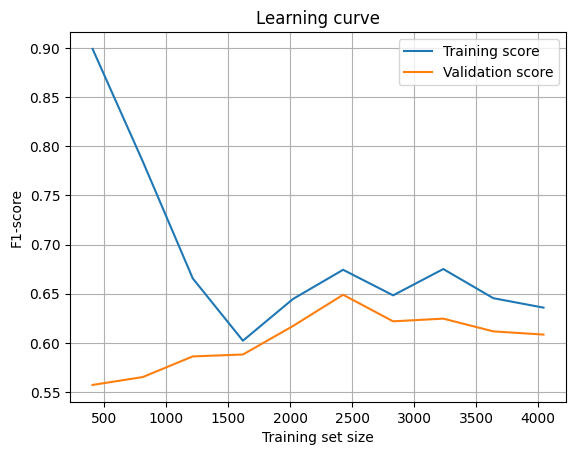

In [244]:
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train,
    cv=5, scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Средние значения
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# График
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Validation score")
plt.ylabel("F1-score")
plt.xlabel("Training set size")
plt.legend(loc="best")
plt.title("Learning curve")
plt.grid(True)
plt.show()

кривые не так близки, [как на первом графике обучения+валидации](https://colab.research.google.com/drive/1b64skUp4NQvC4cFwh-f6KEJ_CrwE4i2f#scrollTo=nb23HIHhPOoH&line=4&uniqifier=1), дельта < 0.1

построим матрицу ошибок

In [245]:
def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    # set matrix values
    thresh = cm.max() / 2.
    tags = [['TP', 'FN'], ['FP', 'TN']]
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      message = f'{tags[i][j]}\n{cm[i, j]}'
      plt.text(j, i, message,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Real')
    plt.xlabel('Predicted')
    plt.tight_layout()

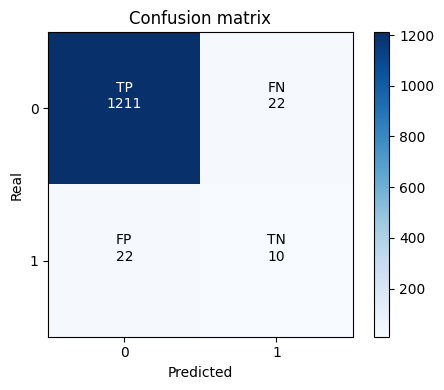

In [246]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
plot_confusion_matrix(cnf_matrix, classes=['0', '1'])

построим ROC-AUC кривую

здесь видно, что для "1" класса precision ~ recall ~ 1/3

In [247]:
def plot_roc_curve(y_test, probs):
  plt.figure(figsize=(5, 4))
  lr_auc = roc_auc_score(y_test, probs)
  fpr, tpr, treshold = roc_curve(y_test, probs)
  plt.plot(fpr, tpr, label=f"AUC= {str(round(lr_auc, 6))}", color='red')
  plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC-кривая')
  plt.legend()
  plt.show()

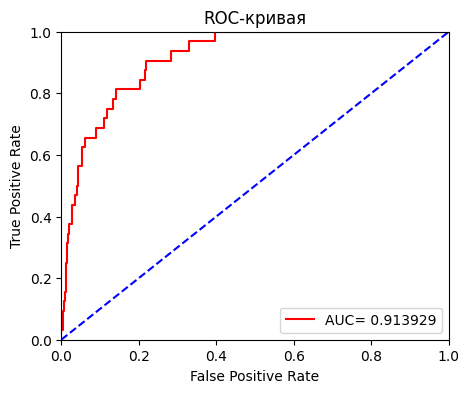

In [248]:
probs = best_model.predict_proba(scaled_X_test_pca)
probs = probs[:, 1]
plot_roc_curve(y_test, probs)

очень хорошее значение auc!

# 9. XGBoost & AdaBoost

In [249]:
xgb_model = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [250]:
y_pred = xgb_model.predict(scaled_X_test_pca)
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred))


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1233
           1       0.31      0.28      0.30        32

    accuracy                           0.97      1265
   macro avg       0.65      0.63      0.64      1265
weighted avg       0.96      0.97      0.97      1265



In [251]:
base_estimator = DecisionTreeClassifier(max_depth=1)

ada_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

ada_model.fit(X_resampled, y_resampled)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [252]:
y_pred = ada_model.predict(scaled_X_test_pca)
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred))


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1233
           1       0.24      0.47      0.32        32

    accuracy                           0.95      1265
   macro avg       0.61      0.72      0.65      1265
weighted avg       0.97      0.95      0.96      1265



эти методы хорошо выявляют нелинейные связи (а судя по кластерному анализу линейных в наших данных нет), поэтому мы смогли получить примерно такое же значение f1-macro без особого тюнинга параметров. для данного датасета именно бустинг имеет перспективы, поскольку деревья как кусочно постоянные функции могут описать сложную структуру данных